In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pathlib import Path


plt.style.use("default")
plt.rcParams.update({
    #"text.usetex": False,
    #"font.family": "serif",
    #"font.serif": ["Helvetica"],
    'figure.dpi': 200,  # renders images larger for notebook
    'axes.grid': True,
    'grid.alpha': 0.3,

})

DATA_SOURCE = Path.cwd().parent / 'data' / 'input' / 'raw'
PROC_SOURCE = DATA_SOURCE.parent/ "processed"


In [2]:
ds = pd.read_pickle(PROC_SOURCE / "ten_materials.pkl.gz")
# ds = pd.read_pickle(PROC_SOURCE / "N49.pkl.gz")
full_b, full_h = ds.loc[:, [f"B_t_{k}" for k in range(1024)]].to_numpy(), ds.loc[:, [f"H_t_{k}" for k in range(1024)]].to_numpy()

In [3]:
print(full_b.shape)
print(full_b[:, 0].shape)

(186747, 1024)
(186747,)


In [4]:
from utils.experiments import bool_filter_sine, bool_filter_triangular, get_waveform_est
t = np.arange(1024)
template_lbls = ['other', 'square', 'triangular', 'sine']

ds["waveform"] = get_waveform_est(full_b)


waveform
0    116060
1     13920
2     49262
3      7505
Name: count, dtype: int64


[]

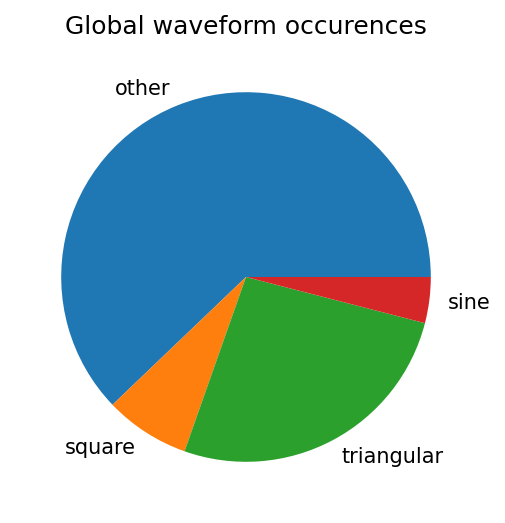

In [5]:
counts_per_waveform = ds['waveform'].value_counts().sort_index()
print(counts_per_waveform)
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
ax.pie(counts_per_waveform.to_numpy().ravel(), labels=template_lbls)
ax.set_title("Global waveform occurences")
plt.plot()

# waveform
# 0    116818
# 1     13920
# 2     49262
# 3      6747
# Name: count, dtype: int64

[]

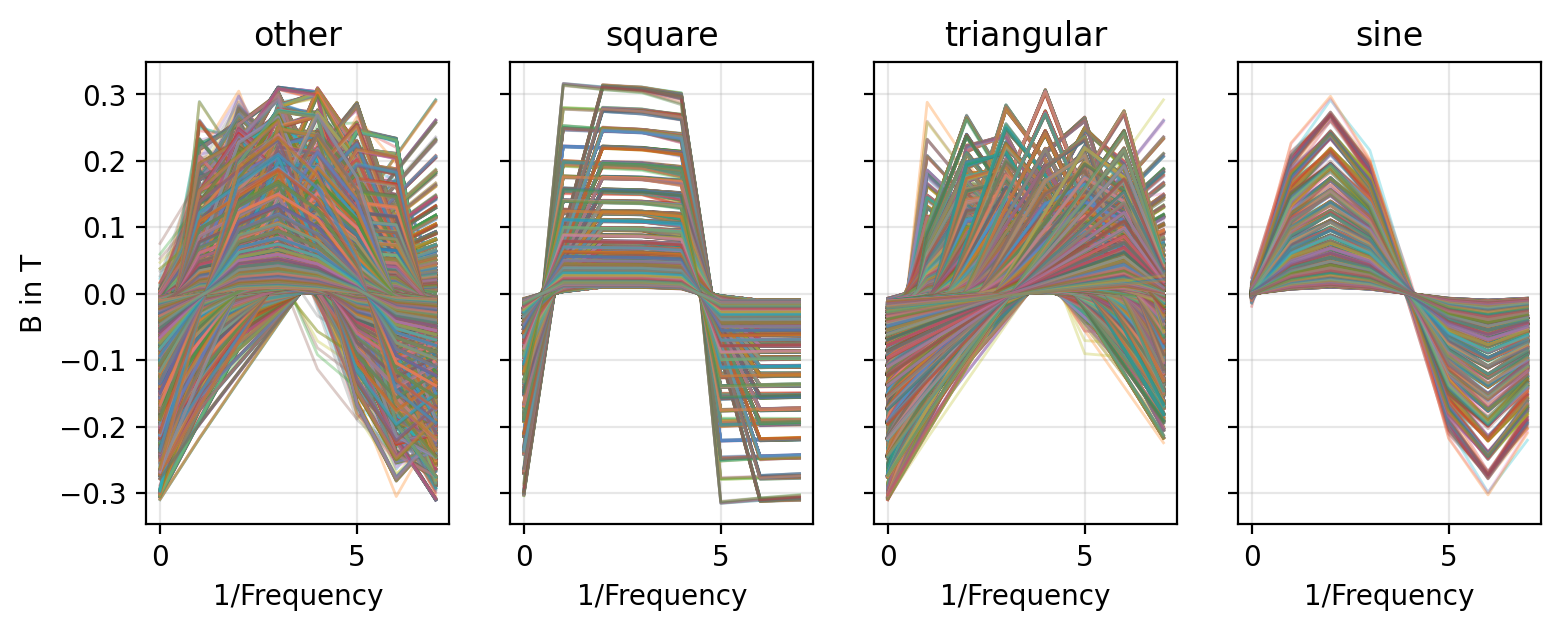

In [6]:
fig, axes = plt.subplots(1, len(template_lbls), dpi=200, figsize=(9, 3), sharex=True, sharey=True)

doi = ds
doi_b = full_b[:, ::128]  # only 16 samples of period
for i, ax in enumerate(axes):
    ax.plot(doi_b[doi.waveform == i, :].T, alpha=0.3, lw=1.0)

axes[0].set_ylabel("B in T")
for ax in axes:
    ax.set_xlabel("1/Frequency")
for i, lbl in enumerate(template_lbls):
    axes[i].set_title(lbl)
plt.plot()

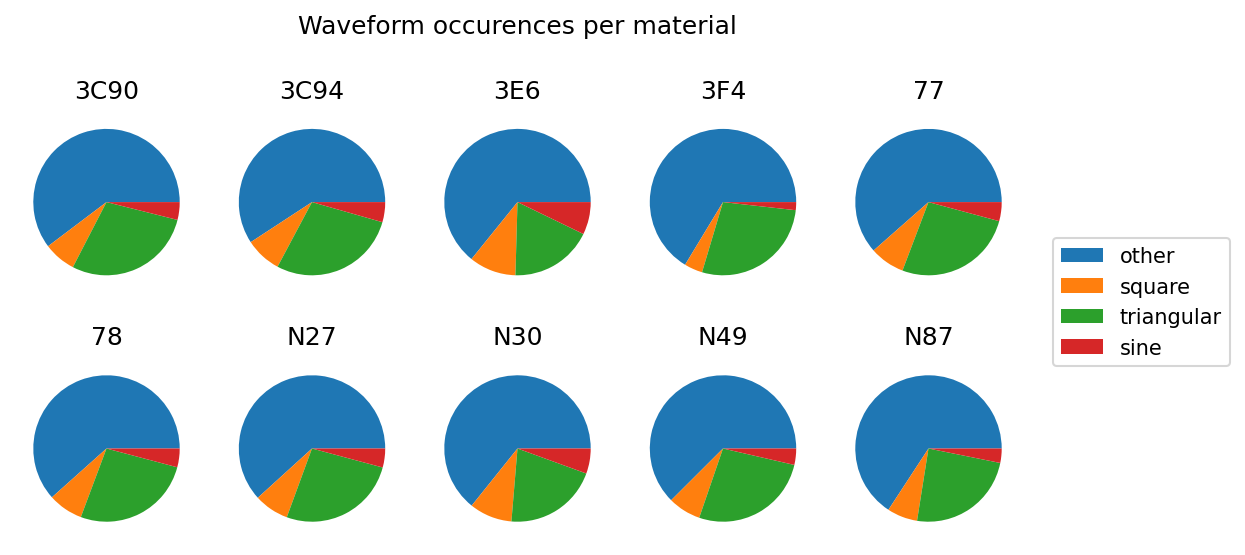

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):

    counts_per_waveform = mat_df['waveform'].value_counts().sort_index()
    ax.pie(counts_per_waveform.to_numpy().ravel())
    ax.set_title("Waveform occurences")    
    ax.set_title(mat_lbl)

fig.legend(labels=template_lbls, loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Waveform occurences per material")
fig.tight_layout()

# High frequency oscillation check


In [8]:
plt.rcParams.update({'font.size': 8})

sine
3.5200934187243707e-06
sine
5.960040905588294e-06
triangular
6.769747338379253e-05
square
0.0005925508152478302


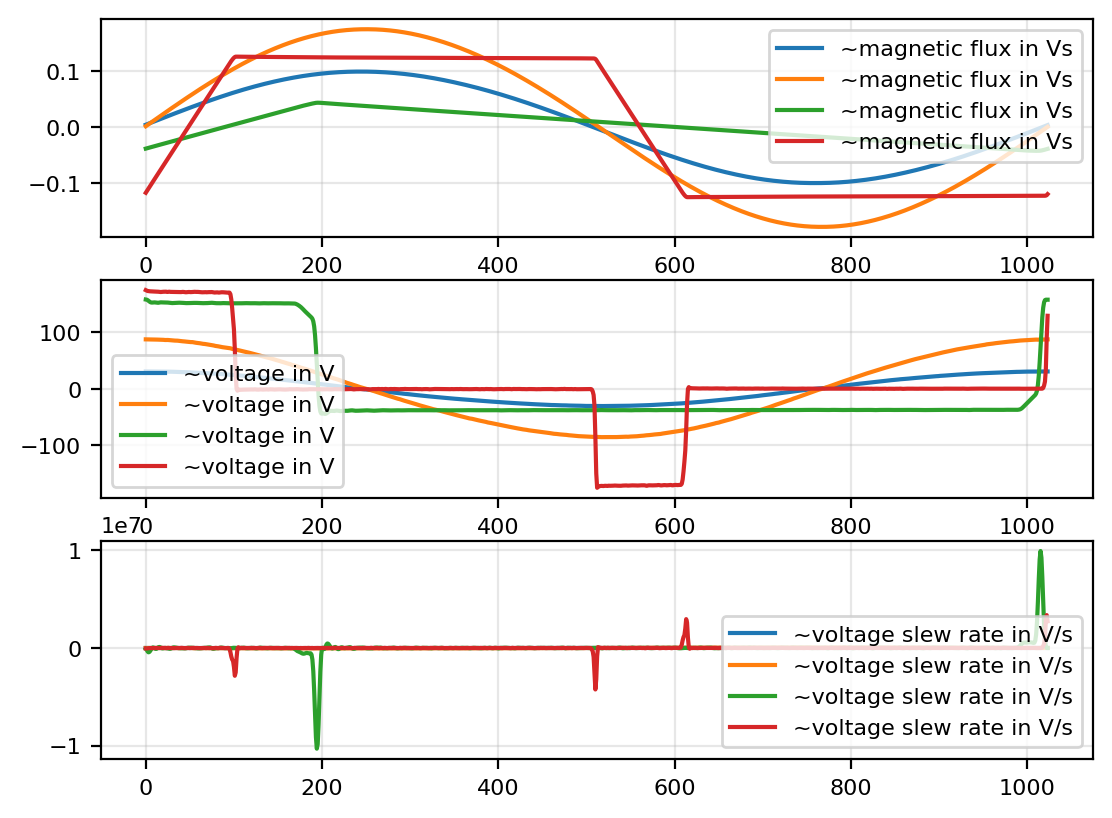

In [9]:
# no = 10000 # vs. 10
# no = 1005
# no = 10
numbers = [10, 100, 1000, 10000]
fig, axes = plt.subplots(3)

for no in numbers:
    # print(ds.loc[no])
    # plt.plot(full_h[no], full_b[no]) 

    # plt.plot(full_b[no])
    # plt.plot(full_h[no])

    axes[0].plot(full_b[no], label="~magnetic flux in Vs")
    axes[1].plot(ds.loc[no]["freq"]*np.gradient(full_b[no]), label="~voltage in V")
    axes[2].plot(ds.loc[no]["freq"]**2*np.gradient(np.gradient(full_b[no])), label="~voltage slew rate in V/s")

    rms = np.sqrt(np.mean(np.gradient(np.gradient(full_b[no]))**2))
    rmq = np.sqrt(np.mean(np.gradient(np.gradient(full_b[no]))**4))
    peak = max(np.gradient(np.gradient(full_b[no])))

    print(template_lbls[ds.loc[no]["waveform"]])
    print(rmq/rms)
    

axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.show()

# detect change in time (absolute time as single switching instance (e.g. the GaN device turn on) is independend of switching frequency)
# classify the switching instance:
#   - from what voltage to what voltage?
#   - how fast?
#   - how many switching instances?
#   (- at which time?) - somehow encoded? maybe the CNN can use it to be "careful" at specific times



# Saturation Flux Density

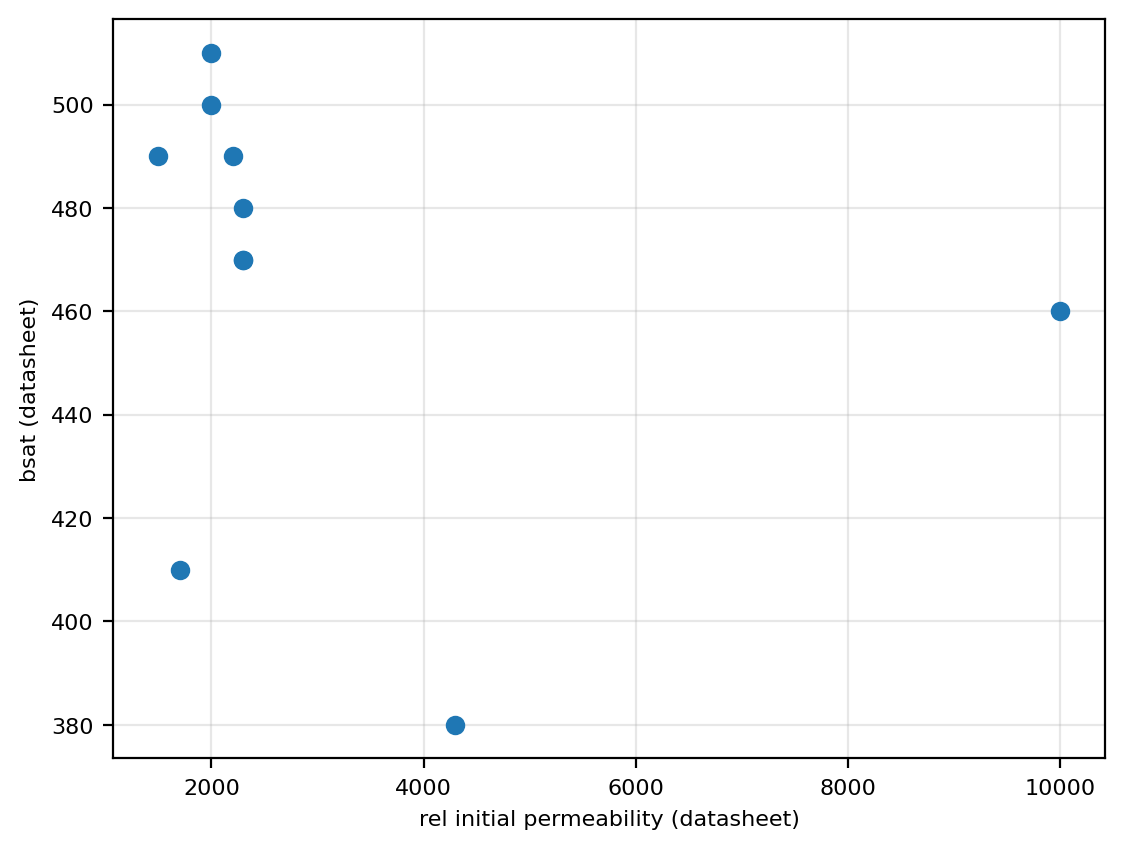

In [10]:
mats = ["3c94", "78" , "3c90", "3f4", "3e6", "n27", "77", "n30", "n49", "n87"]
mur_is = [2300, 2300, 2300, 1700, 10000, 2000, 2000, 4300, 1500, 2200]
bsats = [470,480,470,410,460,500,510,380,490,490]

plt.plot(mur_is, bsats, "o")
plt.xlabel("rel initial permeability (datasheet)")
plt.ylabel("bsat (datasheet)")
plt.show()